# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*Answer*: In this project we will analyze the types and frequencies of NYPD 911 service calls and arrests in the New York City. We will work on two datasets: one containing the details of reported incidents and another documenting arrest records. By examining the most common types of incidents and arrests, we will seek to find insights into crime and public safety trends in NYC.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [177]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### **Dataset 1**

Type: *CSV*

Method: *The data was gathered by downloading the csv file manually from NYC Open Data portal.*

Reason for Selection: *This dataset documents the volume and nature of incidents reported to the NYPD,  We can use this dataset to understand the type of incidents reported to NYPD.*

Download link: https://data.cityofnewyork.us/Public-Safety/NYPD-Calls-for-Service-Year-to-Date-/n2zq-pubd/about_data

Dataset variables:

* *cad_evnt_id: unique id generated by 911 system*
* *create_date: Date of call*
* *incident_date: Date of incident*
* *incident_time: Time of incident*
* *create_date: Date of call*
* *incident_date: Date of incident*
* *nypd_pct_cd: NYPD precinct call is in*
* *boro_nm: Borough call is in*
* *patrl_boro_nm: NYPD patrol Borough call is in*
* *geo_cd_x: The X-Coordinate of the midblock of the street segment where the violation was issued*
* *geo_cd_y: The Y-Coordinate of the midblock of the street segment where the violation was issued*
* *radio_code: NYPD code used to inform NYPD member of service the nature of the call*
* *typ_desc: Description based on RADIO_CODE*
* *cip_jobs: Flag indicating if the call relates to a Crime In Progress (CIP)*
* *add_ts: Timestamp of when the call was added to the system*
* *disp_ts: Timestamp of when the call was dispatched to a responding unit*
* *arrivd_ts: Timestamp of when the responding unit arrived on the scene*
* *closng_ts: Timestamp of when the call was marked closed*
* *latitude: The Latitude of the midblock of the street segment where the violation was issued*
* *longitude: The Longitude of the midblock of the street segment where the violation was issued*

In [180]:
#FILL IN 1st data gathering and loading method

calls = pd.read_csv("NYPD_Calls_for_Service_YTD.csv")

#### **Dataset 2**

Type: *CSV*

Method: *The data was gathered by using the NYC Open Data portal API*

Reason for selection: This dataset contains the breakdown of every arrest in NYC by the NYPD during the current year. This dataset can help provide insights into law enforcement activites in realtion to reported incidents. 

NYC Open data portal: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/about_data

Dataset variables:

*   *arrest_key: Randomly generated persistent ID for each arrest*
*   *arrest_date: Exact date of arrest for the reported event*
*   *pd_cd: Three digit internal classification code*
*   *pd_desc: Description of internal classification corresponding with PD code*
*   *ky_cd: Three digit internal classification code*
*   *ofns_desc: Description of internal classification corresponding with KY code*
*   *law_code: Law code charges corresponding to the NYS Penal Law, VTL and other various local laws*
*   *law_cat_cd: Level of offense: felony, misdemeanor, violation*
*   *arrest_boro: Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)*
*   *arrest_precinct: Precinct where the arrest occurred*
*   *jurisdiction_code: Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit)*
*   *age_group: Perpetrator’s age within a category*
*   *perp_sex: Perpetrator’s sex description*
*   *perp_race: Perpetrator’s race description*
*   *x_coord_cd: Midblock X-coordinate for New York State Plane Coordinate System*
*   *y_coord_cd: Midblock Y-coordinate for New York State Plane Coordinate System*
*   *latitude: Latitude coordinate for Global Coordinate System*
*   *longitude: Longitude coordinate for Global Coordinate System*
*   *geocoded_column: New Georeferenced Column*

In [183]:
#FILL IN 2nd data gathering and loading method

# URL to access the API
url = "https://data.cityofnewyork.us/resource/uip8-fykc.csv?$limit=50000"

# Create an HTTP GET request for US cities demographics
response = requests.get(url)

# Raise exception if we made requet resulting in an error
response.raise_for_status()

# Save the data to a csv file
with open("arrests_data.csv", "wb") as f:
    f.write(response.content)

# Load the data into our dataframe
arrests = pd.read_csv("arrests_data.csv")

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [185]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Completeness (Check for missing values)

In [190]:
#FILL IN - Inspecting the dataframe visually - calls dataset

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cad_evnt_id    50000 non-null  int64  
 1   create_date    50000 non-null  object 
 2   incident_date  50000 non-null  object 
 3   incident_time  50000 non-null  object 
 4   nypd_pct_cd    50000 non-null  int64  
 5   boro_nm        50000 non-null  object 
 6   patrl_boro_nm  50000 non-null  object 
 7   geo_cd_x       50000 non-null  int64  
 8   geo_cd_y       50000 non-null  int64  
 9   radio_code     50000 non-null  object 
 10  typ_desc       50000 non-null  object 
 11  cip_jobs       50000 non-null  object 
 12  add_ts         50000 non-null  object 
 13  disp_ts        50000 non-null  object 
 14  arrivd_ts      39143 non-null  object 
 15  closng_ts      50000 non-null  object 
 16  latitude       50000 non-null  float64
 17  longitude      50000 non-null  float64
dtypes: flo

In [192]:
#FILL IN - Inspecting the dataframe programmatically - calls dataset

calls.isnull().sum()

cad_evnt_id          0
create_date          0
incident_date        0
incident_time        0
nypd_pct_cd          0
boro_nm              0
patrl_boro_nm        0
geo_cd_x             0
geo_cd_y             0
radio_code           0
typ_desc             0
cip_jobs             0
add_ts               0
disp_ts              0
arrivd_ts        10857
closng_ts            0
latitude             0
longitude            0
dtype: int64

Missing values in arrivd_ts

In [195]:
# Check for any duplicated values in calls dataset

calls.duplicated().sum()

0

No Duplicates found in calls dataset

In [198]:
#FILL IN - Inspecting the dataframe visually - arrests dataset

arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arrest_key         50000 non-null  int64  
 1   arrest_date        50000 non-null  object 
 2   pd_cd              49999 non-null  float64
 3   pd_desc            50000 non-null  object 
 4   ky_cd              49991 non-null  float64
 5   ofns_desc          50000 non-null  object 
 6   law_code           50000 non-null  object 
 7   law_cat_cd         49681 non-null  object 
 8   arrest_boro        50000 non-null  object 
 9   arrest_precinct    50000 non-null  int64  
 10  jurisdiction_code  50000 non-null  int64  
 11  age_group          50000 non-null  object 
 12  perp_sex           50000 non-null  object 
 13  perp_race          50000 non-null  object 
 14  x_coord_cd         50000 non-null  int64  
 15  y_coord_cd         50000 non-null  int64  
 16  latitude           500

In [200]:
#FILL IN - Inspecting the dataframe programmatically - arrests dataset

arrests.isnull().sum()

arrest_key             0
arrest_date            0
pd_cd                  1
pd_desc                0
ky_cd                  9
ofns_desc              0
law_code               0
law_cat_cd           319
arrest_boro            0
arrest_precinct        0
jurisdiction_code      0
age_group              0
perp_sex               0
perp_race              0
x_coord_cd             0
y_coord_cd             0
latitude               0
longitude              0
geocoded_column        0
dtype: int64

Missing values in law_cat_cd column

In [203]:
# Also, check for any duplicated values in arrests dataset

arrests.duplicated().sum()

0

No duplicates found in the arrests dataset.

Issue and justification: *The arrivd_ts column in calls dataset has 10857 missing values out of 50000. The law_cat_cd column in the arrests dataset has 319 missing values. These missing values in both datasets can cause issues when analyzing arrival times and categorizing arrest data. Hence, we will drop these columns*

### Quality Issue 2: Validity

In [208]:
#FILL IN - Inspecting the dataframe visually - calls dataset

calls.sample(10)

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,patrl_boro_nm,geo_cd_x,geo_cd_y,radio_code,typ_desc,cip_jobs,add_ts,disp_ts,arrivd_ts,closng_ts,latitude,longitude
38098,99891470,2024-01-03T00:00:00.000,2024-01-03T00:00:00.000,04:41:36,40,BRONX,PATROL BORO BRONX,1007217,234877,69I,IAB,Non CIP,2024-01-03T04:41:36.000,2024-01-03T04:48:20.000,2024-01-03T05:11:15.000,2024-01-03T05:12:20.000,40.811337,-73.917033
3128,99847860,2024-01-01T00:00:00.000,2024-01-01T00:00:00.000,03:27:50,1,MANHATTAN,PATROL BORO MAN SOUTH,982801,201893,50G9,DISORDERLY: GROUP/TRANSIT,Non CIP,2024-01-01T03:27:50.000,2024-01-01T03:29:00.000,NaN,2024-01-01T03:50:39.000,40.720834,-74.005229
30259,99881842,2024-01-02T00:00:00.000,2024-01-02T00:00:00.000,17:58:35,83,BROOKLYN,PATROL BORO BKLYN NORTH,1006544,195969,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,2024-01-02T17:58:35.000,2024-01-02T17:58:35.000,2024-01-02T17:58:35.000,2024-01-02T18:30:34.000,40.704547,-73.919594
48349,99904018,2024-01-03T00:00:00.000,2024-01-03T00:00:00.000,17:16:11,17,MANHATTAN,PATROL BORO MAN SOUTH,994175,214227,68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,2024-01-03T17:16:11.000,2024-01-03T17:16:11.000,2024-01-03T17:16:11.000,2024-01-03T17:31:49.000,40.754683,-73.964178
28192,99879338,2024-01-02T00:00:00.000,2024-01-02T00:00:00.000,16:15:02,90,BROOKLYN,PATROL BORO BKLYN NORTH,994115,196514,54E1,AMBULANCE CASE: EDP/INSIDE,Non CIP,2024-01-02T16:15:02.000,2024-01-02T16:22:03.000,NaN,2024-01-02T16:27:41.000,40.706065,-73.964421
12378,99859596,2024-01-01T00:00:00.000,2024-01-01T00:00:00.000,17:46:29,72,BROOKLYN,PATROL BORO BKLYN SOUTH,990097,179315,68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,2024-01-01T17:46:29.000,2024-01-01T17:46:29.000,2024-01-01T17:46:29.000,2024-01-01T19:45:20.000,40.658861,-73.978928
36379,99889422,2024-01-03T00:00:00.000,2024-01-03T00:00:00.000,01:12:03,106,QUEENS,PATROL BORO QUEENS SOUTH,1030156,186442,54C1,AMBULANCE CASE: CARDIAC/INSIDE,Non CIP,2024-01-03T01:12:03.000,2024-01-03T01:12:49.000,NaN,2024-01-03T01:40:41.000,40.678306,-73.834497
31934,99883921,2024-01-02T00:00:00.000,2024-01-02T00:00:00.000,19:32:16,32,MANHATTAN,PATROL BORO MAN NORTH,1000842,239098,10V2,INVESTIGATE/POSSIBLE CRIME: SUSP VEHICLE/OUTSIDE,Non CIP,2024-01-02T19:32:16.000,2024-01-02T19:32:16.000,2024-01-02T19:32:16.000,2024-01-02T19:46:33.000,40.822937,-73.940053
20408,99869602,2024-01-02T00:00:00.000,2024-01-02T00:00:00.000,07:24:01,18,MANHATTAN,PATROL BORO MAN SOUTH,988036,216885,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,2024-01-02T07:24:01.000,2024-01-02T07:24:01.000,2024-01-02T07:24:01.000,2024-01-02T08:05:10.000,40.761983,-73.986335
49040,99904854,2024-01-03T00:00:00.000,2024-01-03T00:00:00.000,17:50:20,46,BRONX,PATROL BORO BRONX,1008001,247212,10V2,INVESTIGATE/POSSIBLE CRIME: SUSP VEHICLE/OUTSIDE,Non CIP,2024-01-03T17:50:20.000,2024-01-03T17:50:31.000,2024-01-03T17:50:36.000,2024-01-03T20:49:31.000,40.845191,-73.914158


In [210]:
# Check for inconsistencies in borough names in calls dataset

calls["boro_nm"].unique()

array(['BRONX', 'QUEENS', 'BROOKLYN', 'MANHATTAN', 'STATEN ISLAND',
       '(null)'], dtype=object)

In [212]:
#FILL IN - Inspecting the dataframe programmatically - calls dataset

calls["boro_nm"].value_counts()

boro_nm
BROOKLYN         15343
MANHATTAN        13261
BRONX             9839
QUEENS            9590
STATEN ISLAND     1966
(null)               1
Name: count, dtype: int64

All borough names are in upper case. We will normalize and change it to title case.

In [215]:
#FILL IN - Inspecting the dataframe visually - arrests dataset

arrests.sample(10)

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
28631,282159868,2024-02-13T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,BLACK,1016006,242238,40.831508,-73.885245,POINT (-73.885245 40.831508)
12255,281041966,2024-01-24T00:00:00.000,500.0,"CONTROLLED SUBSTANCE,POSSESS.",117.0,DANGEROUS DRUGS,PL 2202101,F,M,10,0,45-64,M,BLACK HISPANIC,982372,212984,40.751271,-74.006777,POINT (-74.006777 40.751271)
47993,283521846,2024-03-11T00:00:00.000,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,S,121,0,25-44,M,BLACK,940343,162889,40.613663,-74.158142,POINT (-74.158142 40.613663)
30310,282279490,2024-02-14T00:00:00.000,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,52,0,<18,M,WHITE HISPANIC,1013073,254152,40.864216,-73.895795,POINT (-73.89579452686064 40.864216089956884)
40453,282591907,2024-02-21T00:00:00.000,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,60,0,25-44,M,BLACK,990796,149587,40.577258,-73.976436,POINT (-73.976436 40.577258)
24738,283859082,2024-03-16T00:00:00.000,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,M,28,0,25-44,M,BLACK,999205,233329,40.807097,-73.945979,POINT (-73.94597872438803 40.80709737571291)
14268,280421671,2024-01-12T00:00:00.000,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,30,1,45-64,M,BLACK,997963,240371,40.826428,-73.950451,POINT (-73.95045075558801 40.82642770243247)
42870,281836837,2024-02-07T00:00:00.000,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,75,0,45-64,F,BLACK,1020327,176285,40.650466,-73.869986,POINT (-73.869986 40.650466)
9092,281293735,2024-01-29T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,B,47,0,18-24,F,WHITE HISPANIC,1026486,262591,40.887325,-73.847247,POINT (-73.847247 40.887325)
13754,282039527,2024-02-11T00:00:00.000,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510D,F,K,62,0,25-44,M,WHITE HISPANIC,986617,163774,40.616199,-73.991472,POINT (-73.991472 40.616199)


In [217]:

#FILL IN - Inspecting the dataframe programmatically
arrests["arrest_boro"].unique()

array(['K', 'Q', 'S', 'B', 'M'], dtype=object)

In [219]:
# Check for inconsistencies in borough names in arrests dataset

arrests["arrest_boro"].value_counts()

arrest_boro
K    13582
M    12026
B    11250
Q    10868
S     2274
Name: count, dtype: int64

The borough names are stored as upper case single letters.

Issue and justification: *Both datasets have included borough names column and there are inconsistenceis in the entries that can lead to errors during analysis. The calls dataset uses borough names in all upper case. And, the arrest dataset uses only an upper case letter to represent borough names. Borough names should be consistent in both datasets and we will normalize the text to keep it consistent in both the columns.*

### Quality Issue 3: Accuracy

In [224]:
#FILL IN - Inspecting the dataframe visually - calls dataset

calls.head()

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,patrl_boro_nm,geo_cd_x,geo_cd_y,radio_code,typ_desc,cip_jobs,add_ts,disp_ts,arrivd_ts,closng_ts,latitude,longitude
0,99842231,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:11:38,45,BRONX,PATROL BORO BRONX,1031438,249344,52D6,DISPUTE: FAMILY,Non CIP,2024-01-01T00:02:04.000,2024-01-01T00:02:04.000,NaN,2024-01-01T00:13:01.000,40.850949,-73.829434
1,99842388,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:19:46,110,QUEENS,PATROL BORO QUEENS NORTH,1022087,208229,52D6,DISPUTE: FAMILY,Non CIP,2024-01-01T00:09:59.000,2024-01-01T00:11:05.000,NaN,2024-01-01T00:57:28.000,40.738144,-73.863466
2,99842587,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:31:06,108,QUEENS,PATROL BORO QUEENS NORTH,1007298,209993,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,2024-01-01T00:01:21.000,2024-01-01T00:02:19.000,2024-01-01T01:19:58.000,2024-01-01T01:20:02.000,40.743037,-73.916826
3,99843964,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,23:53:22,114,QUEENS,PATROL BORO QUEENS NORTH,1002279,222019,34K1,ASSAULT (IN PROGRESS): KNIFE/INSIDE,Critical,2024-01-01T00:06:11.000,2024-01-01T00:07:19.000,2024-01-01T00:19:27.000,2024-01-01T01:03:22.000,40.776057,-73.934906
4,99844026,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,23:57:38,66,BROOKLYN,PATROL BORO BKLYN SOUTH,987908,174328,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,2024-01-01T00:04:38.000,2024-01-01T01:45:33.000,NaN,2024-01-01T02:23:34.000,40.645174,-73.986820


In [226]:
#FILL IN - Inspecting the dataframe programmatically - calls dataset

# Check the data type of the date/time columns in call dataset

calls.dtypes

cad_evnt_id        int64
create_date       object
incident_date     object
incident_time     object
nypd_pct_cd        int64
boro_nm           object
patrl_boro_nm     object
geo_cd_x           int64
geo_cd_y           int64
radio_code        object
typ_desc          object
cip_jobs          object
add_ts            object
disp_ts           object
arrivd_ts         object
closng_ts         object
latitude         float64
longitude        float64
dtype: object

In [228]:
#FILL IN - Inspecting the dataframe visually - arrests dataset

arrests.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
0,279884335,2024-01-03T00:00:00.000,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,2024-01-03T00:00:00.000,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,2024-01-04T00:00:00.000,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,2024-01-15T00:00:00.000,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,2024-01-07T00:00:00.000,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


In [230]:
# Check the data type of date/time columns in arrests dataset

arrests.dtypes

arrest_key             int64
arrest_date           object
pd_cd                float64
pd_desc               object
ky_cd                float64
ofns_desc             object
law_code              object
law_cat_cd            object
arrest_boro           object
arrest_precinct        int64
jurisdiction_code      int64
age_group             object
perp_sex              object
perp_race             object
x_coord_cd             int64
y_coord_cd             int64
latitude             float64
longitude            float64
geocoded_column       object
dtype: object

In [232]:
arrests[["arrest_date", "age_group"]].dtypes

arrest_date    object
age_group      object
dtype: object

In [234]:
# Inspecting uniques values in age_group

arrests["age_group"].unique()

array(['45-64', '25-44', '18-24', '65+', '<18'], dtype=object)

Issue and justification: *In the calls and arrest dataset, columns like create_date, incident_date, indcident_time, arrivd_ts, arrest_date are stored as strings (object type) which could result in inaccurate calculation and analysis. The time and date columns in both the datasets must be stores in datetime format for analysis. Also, age_group is stored as object type, for us to perform analysis, it must be converted to categorical type.*

### Tidiness Issue 1: Multiple types of observational units are stored in the same table

In [238]:
#FILL IN - Inspecting the dataframe visually - call dataset

calls.head()

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,patrl_boro_nm,geo_cd_x,geo_cd_y,radio_code,typ_desc,cip_jobs,add_ts,disp_ts,arrivd_ts,closng_ts,latitude,longitude
0,99842231,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:11:38,45,BRONX,PATROL BORO BRONX,1031438,249344,52D6,DISPUTE: FAMILY,Non CIP,2024-01-01T00:02:04.000,2024-01-01T00:02:04.000,NaN,2024-01-01T00:13:01.000,40.850949,-73.829434
1,99842388,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:19:46,110,QUEENS,PATROL BORO QUEENS NORTH,1022087,208229,52D6,DISPUTE: FAMILY,Non CIP,2024-01-01T00:09:59.000,2024-01-01T00:11:05.000,NaN,2024-01-01T00:57:28.000,40.738144,-73.863466
2,99842587,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:31:06,108,QUEENS,PATROL BORO QUEENS NORTH,1007298,209993,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,2024-01-01T00:01:21.000,2024-01-01T00:02:19.000,2024-01-01T01:19:58.000,2024-01-01T01:20:02.000,40.743037,-73.916826
3,99843964,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,23:53:22,114,QUEENS,PATROL BORO QUEENS NORTH,1002279,222019,34K1,ASSAULT (IN PROGRESS): KNIFE/INSIDE,Critical,2024-01-01T00:06:11.000,2024-01-01T00:07:19.000,2024-01-01T00:19:27.000,2024-01-01T01:03:22.000,40.776057,-73.934906
4,99844026,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,23:57:38,66,BROOKLYN,PATROL BORO BKLYN SOUTH,987908,174328,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,2024-01-01T00:04:38.000,2024-01-01T01:45:33.000,NaN,2024-01-01T02:23:34.000,40.645174,-73.986820


In [240]:
#FILL IN - Inspecting the dataframe programmatically - calls dataset

calls[["create_date", "incident_date", "incident_time"]].head()

,create_date,incident_date,incident_time
0,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:11:38
1,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:19:46
2,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:31:06
3,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,23:53:22
4,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,23:57:38


In [242]:
# Inspect the date & time columns in calls dataset

calls[["create_date", "incident_date", "incident_time"]].dtypes

create_date      object
incident_date    object
incident_time    object
dtype: object

Issue and justification: *The NYPD calls dataset has multiple columns for date-related information (create_date, incident_date, add_ts, arrvd_ts). These columns are redundant and violate tidy data principles can make analysis complicated. These columns can be merged to reduce rendundancy and for simplifying analysis.*

### Tidiness Issue 2: Untidy structure -Redundant information

In [246]:
#FILL IN - Inspecting the dataframe visually - arrests dataset

arrests.sample(5)

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
37510,283482314,2024-03-10T00:00:00.000,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,75,0,25-44,M,BLACK,1014657,185798,40.676597,-73.890377,POINT (-73.89037706677782 40.67659708527219)
41212,282594802,2024-02-21T00:00:00.000,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,110,0,45-64,M,WHITE HISPANIC,1020232,210719,40.744981,-73.870144,POINT (-73.870144 40.744981)
36852,281331548,2024-01-30T00:00:00.000,139.0,"MURDER,UNCLASSIFIED",101.0,MURDER & NON-NEGL. MANSLAUGHTE,PL 1252501,F,Q,114,0,25-44,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)
11041,280964825,2024-01-23T00:00:00.000,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,71,1,25-44,M,BLACK,997935,182677,40.668072,-73.950669,POINT (-73.95066932639968 40.66807228647775)
33241,282066519,2024-02-11T00:00:00.000,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,Q,110,0,25-44,M,WHITE,1023172,212159,40.748919,-73.859524,POINT (-73.859524 40.748919)


In [248]:
#FILL IN - Inspecting the dataframe programmatically - arrests dataset

# Inspect latitude and longitude columns - arrests dataset
arrests[["latitude", "longitude"]].head()

,latitude,longitude
0,40.674496,-73.930571
1,40.602740,-73.750081
2,40.698323,-73.917495
3,40.623238,-74.149217
4,40.734681,-73.810626


In [250]:
# Check if the geocoded_column has redundant data

arrests["geocoded_column"].head()

0    POINT (-73.9305713255961 40.6744956865259)
1                   POINT (-73.750081 40.60274)
2                  POINT (-73.917495 40.698323)
3                  POINT (-74.149217 40.623238)
4                  POINT (-73.810626 40.734681)
Name: geocoded_column, dtype: object

Issue and justification: *Redundant data found in arrests dataset. The geocoded column combines latitude and longitude in a string format. The presence of geocoded column can lead to redundancy and inconsistency in our analysis. The latitude and longitude data is of float type and the data in geocoded column is of string type. Hence, we will drop the geocoded column to remove redundant data for cleaner and consistent data.*

### Tidiness Issue 3: Untidy structure - Multiple variables stored in one column

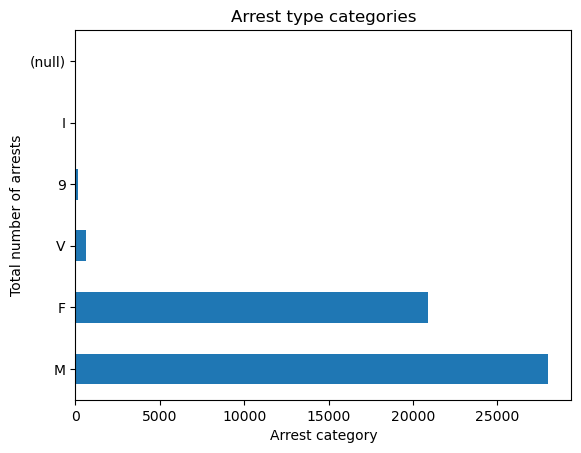

In [254]:
#FILL IN - Inspecting the dataframe visually - arrests dataset

arrests["law_cat_cd"].value_counts().plot(kind="barh")
plt.xlabel("Arrest category")
plt.ylabel("Total number of arrests")
plt.title("Arrest type categories")
plt.show()

In [256]:
#FILL IN - Inspecting the dataframe programmatically - arrests dataset
arrests["law_cat_cd"].unique()

array(['F', 'M', 'V', nan, '9', 'I', '(null)'], dtype=object)

In [258]:
arrests['law_cat_cd'].value_counts()

law_cat_cd
M         27983
F         20896
V           625
9           130
I            46
(null)        1
Name: count, dtype: int64

Issue and justification: *The law_cat_cd documents Level of offense: felony, misdemeanor, violation represented by M, F and V in the dataset. The presence of unclear or ambiguous values like 9 and I suggests that there may be multiple meanings or categories that are not clearly defined. This violates the principle that each variable should be clearly represented in its own column. Hence, we will rename those values to something more descriptive like "Unknown" or "Invalid".*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [262]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted

cleaned_calls = calls.copy()
cleaned_arrests = arrests.copy()

### **Quality Issue 1: Completeness - Handling missing values**

In [265]:
# FILL IN - Apply the cleaning strategy

# Remove rows with missing values in arrivd_ts
cleaned_calls = cleaned_calls.dropna(subset=["arrivd_ts"])

In [267]:
# FILL IN - Validate the cleaning was successful

cleaned_calls.isnull().sum()

cad_evnt_id      0
create_date      0
incident_date    0
incident_time    0
nypd_pct_cd      0
boro_nm          0
patrl_boro_nm    0
geo_cd_x         0
geo_cd_y         0
radio_code       0
typ_desc         0
cip_jobs         0
add_ts           0
disp_ts          0
arrivd_ts        0
closng_ts        0
latitude         0
longitude        0
dtype: int64

In [269]:
# FILL IN - Apply the cleaning strategy - remove rows with missing values in law_cat_cd

cleaned_arrests = cleaned_arrests.dropna(subset=["law_cat_cd"])

In [271]:
# FILL IN - Validate the cleaning was successful

cleaned_arrests.isnull().sum()

arrest_key           0
arrest_date          0
pd_cd                1
pd_desc              0
ky_cd                9
ofns_desc            0
law_code             0
law_cat_cd           0
arrest_boro          0
arrest_precinct      0
jurisdiction_code    0
age_group            0
perp_sex             0
perp_race            0
x_coord_cd           0
y_coord_cd           0
latitude             0
longitude            0
geocoded_column      0
dtype: int64

We can ignore missing values ky_cd and pd_cd as they are very small and we might not use those columns in our analysis

Justification: *The arrivd_ts column in calls dataset had significant amount of missing values. We dropped these records to avoid incomplete data analysis. Also, we dropped the rows with the missing in law_cat_cd column in the arrest dataset for a cleaner dataset*

### **Quality Issue 2: Validity**

In [276]:
#FILL IN - Apply the cleaning strategy

# Mapping the letters to corresponding boroughs
borough_names = {
    "K": "Brooklyn",
    "M": "Manhattan",
    "Q": "Queens",
    "S": "Staten Island",
    "B": "Bronx"
}

# Standardize borough names in  arrests dataset
cleaned_arrests["arrest_boro"] = cleaned_arrests["arrest_boro"].replace(borough_names)

In [278]:
#FILL IN - Validate the cleaning was successful

cleaned_arrests["arrest_boro"].unique()

array(['Brooklyn', 'Queens', 'Staten Island', 'Bronx', 'Manhattan'],
      dtype=object)

In [280]:
#FILL IN - Apply the cleaning strategy

# Normalize borough names in  calls dataset
cleaned_calls["boro_nm"] = cleaned_calls["boro_nm"].str.strip().str.title()

In [282]:
#FILL IN - Validate the cleaning was successful

cleaned_calls["boro_nm"].unique()

array(['Queens', 'Bronx', 'Manhattan', 'Brooklyn', 'Staten Island'],
      dtype=object)

Justification: *Standardizing the borough names in both datasets will ensure borough names are consistent across datasets. This will make dataset easier to merge and analyze.*

### **Quality Issue 3: Accuracy**

In [286]:
#FILL IN - Apply the cleaning strategy - cleaned_calls dataset

cleaned_calls["create_date"] = pd.to_datetime(cleaned_calls["create_date"], errors="coerce")
cleaned_calls["incident_date"] = pd.to_datetime(cleaned_calls["incident_date"], errors="coerce")
cleaned_calls["arrivd_ts"] = pd.to_datetime(cleaned_calls["arrivd_ts"], errors="coerce")

# converting only the time part
cleaned_calls["incident_time"] = pd.to_datetime(cleaned_calls["incident_time"], format="%H:%M:%S", errors="coerce").dt.time

In [287]:
#FILL IN - Validate the cleaning was successful

cleaned_calls[["create_date", "incident_date", "incident_time", "arrivd_ts"]].dtypes

create_date      datetime64[ns]
incident_date    datetime64[ns]
incident_time            object
arrivd_ts        datetime64[ns]
dtype: object

In [290]:
#FILL IN - Apply the cleaning strategy - cleaned_arrests dataset

cleaned_arrests["arrest_date"] = pd.to_datetime(cleaned_arrests["arrest_date"], errors="coerce")

In [292]:
#FILL IN - Validate the cleaning was successful

cleaned_arrests[["arrest_date"]].dtypes

arrest_date    datetime64[ns]
dtype: object

In [294]:
#FILL IN - Apply the cleaning strategy

cleaned_arrests["age_group"] = pd.Categorical(cleaned_arrests["age_group"])

In [296]:
#FILL IN - Validate the cleaning was successful

cleaned_arrests[["age_group"]].dtypes

age_group    category
dtype: object

In [298]:
#FILL IN - Validate the cleaning was successful

cleaned_arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49681 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   arrest_key         49681 non-null  int64         
 1   arrest_date        49681 non-null  datetime64[ns]
 2   pd_cd              49680 non-null  float64       
 3   pd_desc            49681 non-null  object        
 4   ky_cd              49672 non-null  float64       
 5   ofns_desc          49681 non-null  object        
 6   law_code           49681 non-null  object        
 7   law_cat_cd         49681 non-null  object        
 8   arrest_boro        49681 non-null  object        
 9   arrest_precinct    49681 non-null  int64         
 10  jurisdiction_code  49681 non-null  int64         
 11  age_group          49681 non-null  category      
 12  perp_sex           49681 non-null  object        
 13  perp_race          49681 non-null  object        
 14  x_coord_cd 

Justification: Converting these columns from string to datetime format are essential and will ensure accurate analysis. Also, converting the age_group into categorical will help us perform any analysis that will involve sorting or grouping.

### **Tidiness Issue 1: Multiple types of observational units are stored in the same table**

In [302]:
#FILL IN - Apply the cleaning strategy - cleaned_call dataset

# Combine date and time columns into a single column

cleaned_calls["incident_datetime"] = pd.to_datetime(cleaned_calls["incident_date"].astype(str) + " " + cleaned_calls["incident_time"].astype(str))

In [304]:
#FILL IN - Validate the cleaning was successful

#FILL IN - Validate the cleaning was successful

cleaned_calls[["incident_datetime"]].head()

,incident_datetime
2,2023-12-31 22:31:06
3,2023-12-31 23:53:22
6,2023-12-31 23:59:17
7,2023-12-31 23:59:30
8,2024-01-01 00:00:07


Justification: *The incident_time should be combined with incident_date to create complete datetime colums for better analysis. Redundant columns must be stored in a single column for tidy data*

### **Tidiness Issue 2: Untidy structure -Redundant information**

In [308]:
#FILL IN - Apply the cleaning strategy

cleaned_arrests = cleaned_arrests.drop(columns=["geocoded_column"])

In [310]:
#FILL IN - Validate the cleaning was successful

cleaned_arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49681 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   arrest_key         49681 non-null  int64         
 1   arrest_date        49681 non-null  datetime64[ns]
 2   pd_cd              49680 non-null  float64       
 3   pd_desc            49681 non-null  object        
 4   ky_cd              49672 non-null  float64       
 5   ofns_desc          49681 non-null  object        
 6   law_code           49681 non-null  object        
 7   law_cat_cd         49681 non-null  object        
 8   arrest_boro        49681 non-null  object        
 9   arrest_precinct    49681 non-null  int64         
 10  jurisdiction_code  49681 non-null  int64         
 11  age_group          49681 non-null  category      
 12  perp_sex           49681 non-null  object        
 13  perp_race          49681 non-null  object        
 14  x_coord_cd 

Justification: *Mutiple variables stored in the geocoded_column in the arrests dataset violates the principle of data tidiness. Removing redundant data will lead to manageable, consistent data for analysis*

In [313]:
cleaned_arrests["law_cat_cd"].unique()

array(['F', 'M', 'V', '9', 'I', '(null)'], dtype=object)

### **Tidiness Issue 3: Untidy structure - Multiple variables stored in one column**

In [316]:
#FILL IN - Apply the cleaning strategy - arrests dataset

# Replace the values of value of "9" and "I" with "Unknown" & "Invalid"
cleaned_arrests["law_cat_cd"] = cleaned_arrests["law_cat_cd"].replace("9", "Unknown")
cleaned_arrests["law_cat_cd"] = cleaned_arrests["law_cat_cd"].replace("I", "Invalid")
cleaned_arrests["law_cat_cd"] = cleaned_arrests["law_cat_cd"].replace("(null)", np.nan)

In [318]:
#FILL IN - Validate the cleaning was successful

cleaned_arrests["law_cat_cd"].unique()

array(['F', 'M', 'V', 'Unknown', 'Invalid', nan], dtype=object)

In [320]:
cleaned_arrests["law_cat_cd"].isnull().sum()

1

In [322]:
# We can ignore the one null value, as it will effect our analysis

In [324]:
#FILL IN - Validate the cleaning was successful

cleaned_arrests["law_cat_cd"].value_counts()

law_cat_cd
M          27983
F          20896
V            625
Unknown      130
Invalid       46
Name: count, dtype: int64

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [327]:
# round latitude and longitudes to 2 decimal places

cleaned_calls[["latitude", "longitude"]] = cleaned_calls[["latitude", "longitude"]].round(2)
cleaned_arrests[["latitude", "longitude"]] = cleaned_arrests[["latitude", "longitude"]].round(2)

# Combine latitude and longitude into one column for both datasets
cleaned_calls["coordinates"] = list(zip(cleaned_calls["latitude"], cleaned_calls["longitude"]))

cleaned_arrests["coordinates"] = list(zip(cleaned_arrests["latitude"], cleaned_arrests["longitude"]))

In [329]:
#FILL IN - Remove unnecessary variables and combine datasets

# Remove inplace=True and reassign the result to cleaned_calls
cleaned_calls = cleaned_calls.drop(columns=["cad_evnt_id", "incident_date", "incident_time", "nypd_pct_cd",
                                            "geo_cd_x", "geo_cd_y", "radio_code", "cip_jobs",
                                            "add_ts", "disp_ts", "closng_ts", "latitude",
                                            "longitude"])

# Remove inplace=True and reassign the result to cleaned_arrests
cleaned_arrests = cleaned_arrests.drop(columns=["arrest_key", "pd_cd", "ky_cd", "law_code",
                                                "law_cat_cd", "jurisdiction_code",
                                                "x_coord_cd", "y_coord_cd", "latitude",
                                                "longitude"])


In [331]:
# Inspect the whether unnecessary columns have been dropped

cleaned_calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39143 entries, 2 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   create_date        39143 non-null  datetime64[ns]
 1   boro_nm            39143 non-null  object        
 2   patrl_boro_nm      39143 non-null  object        
 3   typ_desc           39143 non-null  object        
 4   arrivd_ts          39143 non-null  datetime64[ns]
 5   incident_datetime  39143 non-null  datetime64[ns]
 6   coordinates        39143 non-null  object        
dtypes: datetime64[ns](3), object(4)
memory usage: 2.4+ MB


In [333]:
# Inspect the whether unnecessary columns have been dropped

cleaned_arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49681 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   arrest_date      49681 non-null  datetime64[ns]
 1   pd_desc          49681 non-null  object        
 2   ofns_desc        49681 non-null  object        
 3   arrest_boro      49681 non-null  object        
 4   arrest_precinct  49681 non-null  int64         
 5   age_group        49681 non-null  category      
 6   perp_sex         49681 non-null  object        
 7   perp_race        49681 non-null  object        
 8   coordinates      49681 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(6)
memory usage: 3.5+ MB


In [335]:
# Combine cleaned_call dataset and cleaned_arrest dataset to create merged data

merged_data = pd.merge(cleaned_calls, cleaned_arrests, left_on=["coordinates", "boro_nm"], right_on=["coordinates", "arrest_boro"], how="inner")

In [336]:
# Inspect the merged dataset
merged_data.sample(5)

,create_date,boro_nm,patrl_boro_nm,typ_desc,arrivd_ts,incident_datetime,coordinates,arrest_date,pd_desc,ofns_desc,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race
313048,2024-01-01,Brooklyn,PATROL BORO BKLYN NORTH,AMBULANCE CASE: EDP/OUTSIDE,2024-01-01 03:11:42,2024-01-01 02:58:39,"(40.73, -73.95)",2024-01-06,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",GRAND LARCENY,Brooklyn,94,25-44,M,BLACK
1002886,2024-01-01,Brooklyn,PATROL BORO BKLYN NORTH,TRANSIT PATROL/INSPECTION BY NON-TRANSIT BUREA...,2024-01-01 12:25:50,2024-01-01 12:25:50,"(40.7, -73.92)",2024-02-08,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,Brooklyn,83,18-24,M,WHITE HISPANIC
5721124,2024-01-03,Bronx,PATROL BORO BRONX,OTHER CRIMES (IN PROGRESS): VIOL ORDER PROTECT...,2024-01-03 11:14:23,2024-01-03 10:48:44,"(40.82, -73.93)",2024-02-14,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,Bronx,44,25-44,M,BLACK
6515574,2024-01-03,Queens,PATROL BORO QUEENS NORTH,AMBULANCE CASE: SERIOUS/INSIDE,2024-01-03 17:12:25,2024-01-03 17:12:25,"(40.75, -73.87)",2024-02-20,LEAVING SCENE-ACCIDENT-PERSONA,VEHICLE AND TRAFFIC LAWS,Queens,110,25-44,M,WHITE HISPANIC
5335546,2024-01-03,Queens,PATROL BORO QUEENS NORTH,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,2024-01-03 07:29:47,2024-01-03 07:29:47,"(40.75, -73.87)",2024-02-17,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,Queens,110,<18,M,WHITE HISPANIC


*All the unnecessary columns have been removed from the datasets and the datasets have been merged for further analysis.*

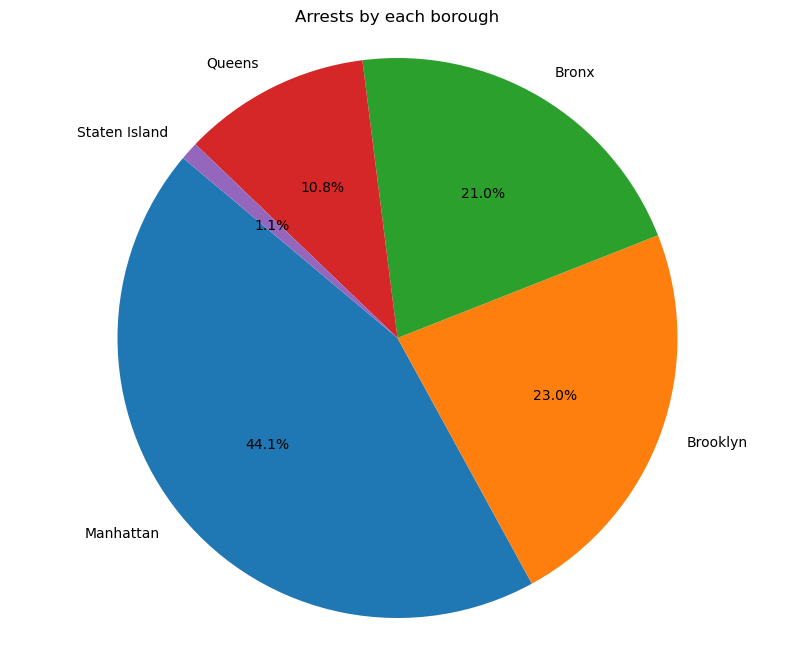

In [340]:
# Visualize arrests in each borough

arrest_borough_counts = merged_data["arrest_boro"].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(arrest_borough_counts, labels=arrest_borough_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Arrests by each borough")
plt.axis("equal")
plt.show()

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [343]:
# FILL IN - Updating/Saving raw and cleaned datasets

# Saving the raw data
calls.to_csv("raw_nypd_calls.csv", index=False)
arrests.to_csv("raw_nypd_arrests.csv", index=False)

# Saving cleaned data
cleaned_calls.to_csv("cleaned_nypd_calls.csv", index=False)
cleaned_arrests.to_csv("cleaned_nypd_arrests.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* What are the most common types of incidents reported to NYPD and the most frequent types of arrests in New York City ?

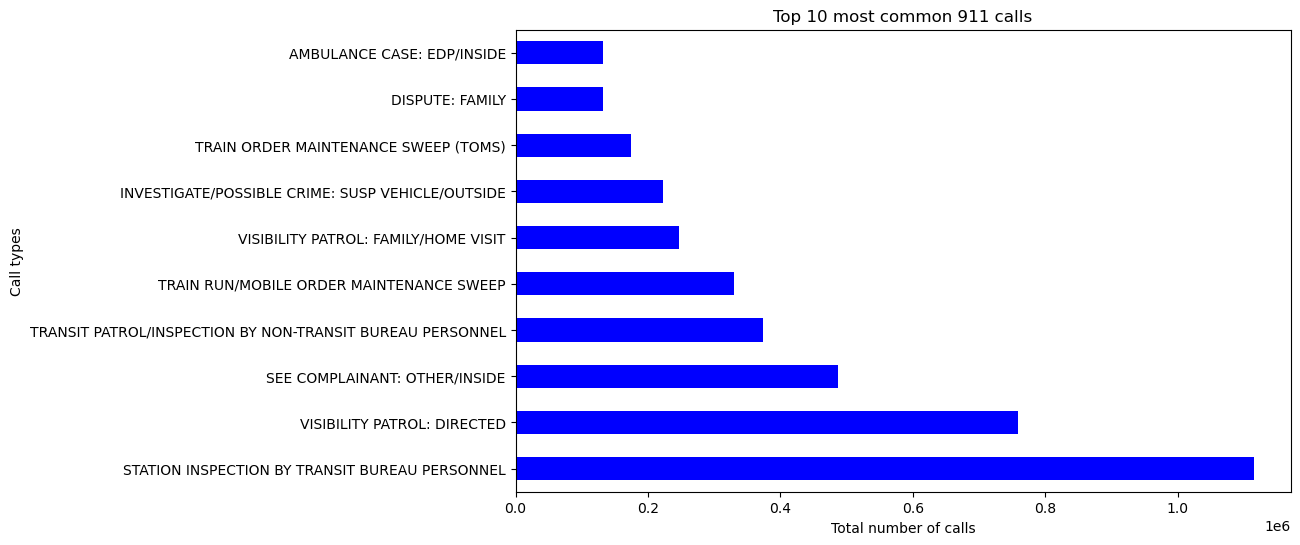

In [347]:
#Visual 1 - Most common calls types to report incidents

top_calls = merged_data["typ_desc"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_calls.plot(kind="barh", color="blue")
plt.title("Top 10 most common 911 calls")
plt.xlabel("Total number of calls")
plt.ylabel("Call types")
plt.show()

*Answer to research question:* The most common type of 911 service call is for a Station Inspection by Transit Bureau personnel

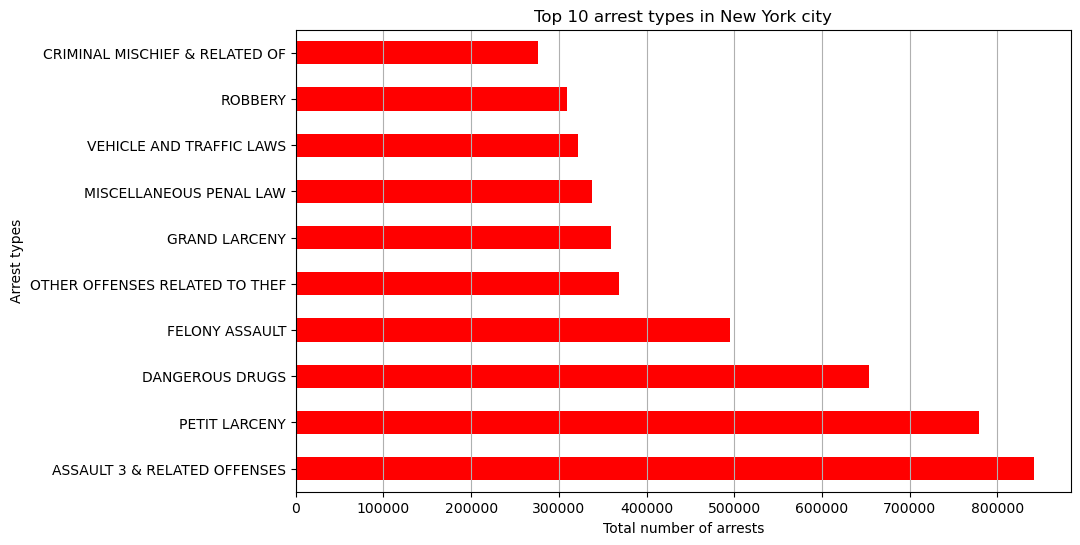

In [350]:
#Visual 2 - Most common arrest types

top_arrests = merged_data['ofns_desc'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_arrests.plot(kind="barh", color="red")
plt.title("Top 10 arrest types in New York city")
plt.xlabel("Total number of arrests")
plt.ylabel("Arrest types")
plt.grid(axis="x")
plt.show()

*Answer to research question:* The most common arrest type in New York city is Assault level 3 & related offences.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete the project, I would have analyzed the datasets for more inconsistencies and untidy structure. I would have also explored further on research questions, such as analyzing trends in incident types over different times of day and how demographic factors, like age and race of perpetrators coorelate with different types of incidents.